# Tutorials - CHM 5716 - Characterization of materials I (Instructor: Prof. Yan Zeng)

Developed by Xiaozhao Liu and Prof. Yan Zeng (Spring 2026)

# Tutorial 1 - Set up environment and install software_1_29_2026

## Set up Anaconda and Jupyter Notebook
- Python standard libraries: https://docs.python.org/3/library/index.html

In [ ]:
# Anaconda download: https://www.anaconda.com/download/success -> Anaconda distribution
# Tips: do not check "Add Anaconda to my PATH environment variable" during installation

# ==========================================
# Once installed, verify: use "Anaconda Prompt" in Windows Start Menu OR terminal in macOS/Linux

conda --version
python --version
conda env list

# # update if needed
# conda update conda -y

# # Optional: Install Jupyter in base environment
# conda install jupyter -y
# jupyter notebook

# ========================================== set up specific environment for this course
# 1. Create a new environment named 'AutoXRDVis' with Python 3.11, -n means name, -y means yes to all prompts
conda create -n AutoXRDVis python=3.11 numpy matplotlib jupyter -y

conda activate AutoXRDVis
# conda deactivate
# conda env remove --name AutoXRDVis

# Install ipykernel to link the environment to Jupyter Notebook
conda install ipykernel
# Register the kernel
python -m ipykernel install --user --name AutoXRDVis --display-name "Python (AutoXRDVis)"


# Launch Jupyter Notebook
jupyter notebook
# CTRL+C to stop the server when done
# SHIFT+ENTER to run a cell in Jupyter Notebook
# NOTE Export to PDF - need to install LaTeX distribution; export to HTML can directly work


## Pymatgen and The Materials Project
- Pymatgen is the core Python library developed by the Materials Project team for materials analysis, data structures, and workflows.
- Pymatgen: https://pymatgen.org/ , https://github.com/materialsproject/pymatgen
    - Cif parser: src/pymatgen/io/cif.py
    - XRD simulator: src/pymatgen/analysis/diffraction/xrd.py
- The Materials Project: https://next-gen.materialsproject.org/

## Install VESTA and basic usage (e.g. Rocksalt)
- Download: https://jp-minerals.org/vesta/en/download.html
- Manual: https://jp-minerals.org/vesta/archives/VESTA_Manual.pdf

### Crystal structure building and editing in VESTA
- Bonding
    - Bond configuration:
        - preferences -> uncheck “start-up search for bonds”
        - edit -> bonds -> new
            - select atom pairs to define bonding
            - set bond search range; typical bond length range is 0–3 Å (measure first if needed)
            - note: the structural model does not inherently represent atomic interactions
            - set search mode (e.g., search A2 bonded to A1) and boundary mode
                - do not search atoms beyond the boundary
                - enable “show polyhedra” and choose “search additional atoms if A1 is included in the boundary”
    - Display Miller planes:
        - use the left sidebar to select atoms for measuring interatomic distances, bond angles, and other geometric parameters
        - edit -> lattice planes -> new -> set Miller indices such as (110), (001), distance etc.
    - Display element names:
        - objects -> toggle data -> check “L” for each element (S is for highlight sphere)
        - style -> properties -> atoms -> label -> choose “names of elements” to display element symbols at atomic sites
    - Adjust atomic radius and color:
        - style -> atoms -> radius and color -> modify atomic radii and colors (refer to Shannon radii if needed)
    - Edit structural data:
        - edit -> edit data
            - unit cell -> modify crystal system and space group
            - structure parameters:
                - add or delete elements
                - adjust Occ. to control site occupancy (percentage for each atomic site)
                - coordinates: change atomic positions
                - Biso (Isotropic Displacement Parameter) and Beq (Equivalent Isotropic Displacement Parameter) describe atomic thermal vibration within the lattice
- Structure modification
    - properties -> general -> line -> select “single unit cell” for 3D visualization
    - adjust additional display parameters as needed
    - further customize atoms, bonds, polyhedra, isosurfaces, and sectional views
- Explore more in the manual!

### Step size and total scan time estimation of XRD experiments
- Given:
    - Time per step = 0.35 s
    - Number of steps = 3510
    - 2θ range = 10° to 80° (total range = 70°)

- Step size = 70° / 3510 = 0.0199° ≈ 0.020°

- Total scan time = (0.35 s × 3510) / 60 = 20.475 min 


### Simulate XRD pattern
- Prepare CIF file 
- Import the CIF file into VESTA by dragging it into the program.
- Open the powder diffraction tool through Utilities → Powder Diffraction Pattern.
- Set calculation parameters:
  - No. of λ = 1
  - Wavelength = 1.5406 Å (Cu Kα)
  - Data range = adjust to the desired 2θ window
  - x_inc (increment) = match your experimental step size (e.g., 0.02°)
  - Other parameters can remain at default values.
- Run the calculation to generate the simulated diffraction pattern.
- Review the Reflections Table for 2θ, intensity, and hkl information.
- Export the Reflection Table once consistency is verified.
- Use Python for further analysis or data extraction from the exported reflection file.


# Tutorial 2 - Powder X-ray diffraction (XRD) data processing and visualization_1_29_2026
- This script is used to process then visualize **experimental XRD data (.xy)** and the **reflection table (.txt) of reference phases**. 
- The **experimental XRD data** was collected by Xiaozhao Liu on Bruker D8 Endeavor in Zeng lab at FSU https://www.yan-zeng.com/.
- The reflection table (.txt) was exported from Crystallographic Information File (CIF) files using VESTA (https://www.jp-minerals.org/vesta/en/download.html)

- NOTE: The CIF files can be obtained from crystallographic databases such as the Materials Project https://next-gen.materialsproject.org/ or the Inorganic Crystal Structure Database (ICSD) https://icsd.products.fiz-karlsruhe.de/, and some other databases. 

## Check files (.xy and .txt)

In [15]:
import glob

help(glob)
help(glob.glob)

Help on module glob:

NAME
    glob - Filename globbing utility.

MODULE REFERENCE
    https://docs.python.org/3.9/library/glob
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

FUNCTIONS
    escape(pathname)
        Escape all special characters.
    
    glob(pathname, *, recursive=False)
        Return a list of paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the pattern '**' will match any files and
        zero or more directories and subdirectories.
    
    ig

In [3]:
import os
import glob

file_path='./data' # forward slash

xy_file_paths = glob.glob(os.path.join(file_path, '*.xy')) 
print('Available .xy file paths:', xy_file_paths)

print('\n')

txt_file_paths = glob.glob(os.path.join(file_path, '*.txt'))
print('Available .txt file paths:', txt_file_paths)


Available .xy file paths: ['./data/XRD_Air.xy', './data/XRD_Ar.xy']


Available .txt file paths: ['./data/Ref_2.txt', './data/Ref_1.txt']


## Process data and plotting

1. Read data in ./data. (folder under current folder)
    - In .xy file, the first column corresponds to peak position (2 $\theta$) value, and the second column corresponds to peak intensity value.
    - In .txt file, the 8th column corresponds to peak position (2 $\theta$) value, and the 9th column corresponds to peak intensity value.
        - Column 8 corresponds to peak position (2θ)
        - Column 9 corresponds to peak intensity
        - Columns 5–7 (F(real), F(imag), |F|) contain the real part, imaginary part, and magnitude of the structure factor:
            - Structure factor definition:
                $F_{hkl} = \sum_{j} f_j \exp\left[ 2\pi i (h x_j + k y_j + l z_j) \right]$
            - Magnitude of the structure factor:
                $|F| = \sqrt{(F_{\text{real}})^2 + (F_{\text{imag}})^2}$
        - Column 11 (M) gives the multiplicity of the (hkl) reflection

2. For data extracted from .txt, we can simulate XRD pattern using Gaussian function https://en.wikipedia.org/wiki/Gaussian_function

    $f = a \cdot \exp\left(-\frac{(x - b)^2}{2\sigma^2}\right)$

    where a, b, and $\sigma$ give the peak height (intensity), peak center (2 $\theta$), and standard deviation (peak width) of the gaussian, respectively.

3. Relationship between FWHM and $\sigma$

    FWHM: Full Width at Half Maximum for Gaussian peaks https://en.wikipedia.org/wiki/Full_width_at_half_maximum

    FWHM = $2 \sqrt{2 \ln 2} \cdot \sigma \approx 2.355 \cdot \sigma$

    So, $\sigma = \frac{\text{FWHM}}{2.355}$

3. Visualize the experimental XRD data and simulated XRD pattern

In [8]:
import numpy as np

help(np.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding=None, *, ndmin=0, like=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return 

In [ ]:
xy_file_paths = './data/XRD_Air.xy'
words = xy_file_paths.split('/')
print(words)
print(words[-1].split('.')[0])

**********************************************************************
First 3 rows from ./data/XRD_Air.xy:
[[ 10.     151.    ]
 [ 10.0371 157.    ]
 [ 10.0741 160.    ]]
-------------------------
The highest peak intensity counts before normalization:     4249.0000
Corresponding two theta for highest peak intensity counts:  18.5956



**********************************************************************
First 3 rows from ./data/XRD_Ar.xy:
[[ 10.     171.    ]
 [ 10.0371 187.    ]
 [ 10.0741 165.    ]]
-------------------------
The highest peak intensity counts before normalization:     3003.0000
Corresponding two theta for highest peak intensity counts:  43.4933





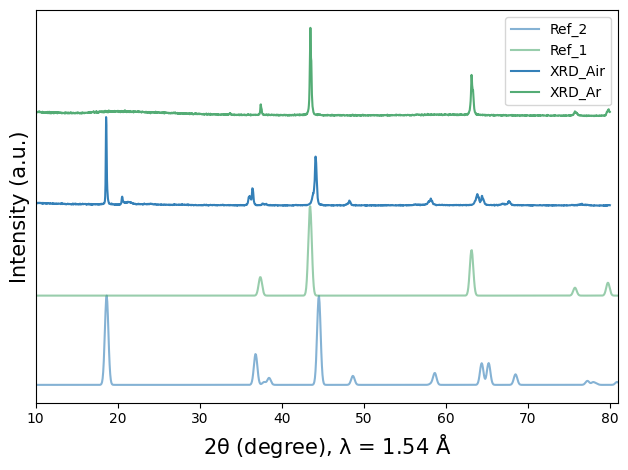

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def read_xy_file(file_path):
    """
    Read experimental XRD data from .xy file
    
    :param file_path: path to the .xy file
    
    :return data_xy: peak positions and intensity
    """
    data_xy = np.genfromtxt(file_path)
    print(70 * '*')
    print(f'First 3 rows from {file_path}:')
    print(data_xy[0:3, :]) # array slicing to print first 3 rows; in python, the index starts from 0
    
    print(25 * '-')
    print('The highest peak intensity counts before normalization: %13.4f' % (np.max(data_xy[:, 1]))) # %13.4f means total 13 characters, 4 after decimal point, f means float
    print(f'Corresponding two theta for highest peak intensity counts: {data_xy[np.argmax(data_xy[:, 1]), 0]:8.4f}') # np.argmax to get the index of the max value
    print('\n\n')
    
    return data_xy

def read_txt_file(file_path):
    """
    Read reference phase data from .txt file: ref_two_theta (column 8), ref_intensity (column 9)

    :param file_path: path to the .txt file

    :return ref_two_theta, ref_intensity: peak positions and intensity
    """
    data_txt = np.genfromtxt(file_path, skip_header=1) # genfromtxt to read data from text file, skip_header=1 to skip the first row (header)
    ref_two_theta, ref_intensity = data_txt[:, 7], data_txt[:, 8]
    
    return ref_two_theta, ref_intensity

def simulate_xrd_pattern(ref_two_theta, ref_intensity):
    """
    Simulate XRD pattern using Gaussian functions

    :param ref_two_theta: peak positions
    :param ref_intensity: peak intensities
    
    :return x_two_theta, gaussian_simulated_intensity
    """
    x_two_theta = np.linspace(10, 81, 1000) # np.linspace(start, stop, num) NOTE endpoint (optional, default=True): If True, 'stop' is the last sample. 
    gaussian_simulated_intensity = np.zeros(x_two_theta.shape) # np.zeros to create an array of zeros with the same shape as x_two_theta

    fwhm = 0.5
    
    # NOTE check description above for explanation -> Relationship between FWHM and $\sigma$.
    sigma = fwhm / 2.355  
    
    for i in range(len(ref_two_theta)):
        a = ref_intensity[i]
        b = ref_two_theta[i]
        gaussian_simulated_intensity += a * np.exp(-(x_two_theta - b)**2 / (2 * sigma**2))
        
    return x_two_theta, gaussian_simulated_intensity

##### NOTE Identify which XRD data and phases to process and plot. -> We can check previous description block. 
selected_phases_idx = [0, 1]
selected_xrd_patterns_idx = [0, 1]


# Error handling
if max(selected_phases_idx) >= len(txt_file_paths):
    print(10 * '!', 'error: selected phase data index out of range')
    print(f'Only {len(txt_file_paths)} txt files found.')
    exit()
    
if max(selected_xrd_patterns_idx) >= len(xy_file_paths):
    print(10 * '!', 'error: selected XRD data index out of range')
    print(f'Only {len(xy_file_paths)} xy files found.')
    exit()

# offset for plotting
current_y_offset = 0
offset_between_plots = 1

colors = ['#3480b8','#54AC75','#FF7F0E','#7572B5']

plt.figure()

# Process and plot reference patterns (.txt)
for i, txt_file_path in enumerate(txt_file_paths):
    if i in selected_phases_idx:

        ref_two_theta, ref_intensity = read_txt_file(txt_file_path)

        ref_two_theta_new, simulated_intensity = simulate_xrd_pattern(ref_two_theta, ref_intensity)
        simulated_intensity_normalized = simulated_intensity / simulated_intensity.max()

        words = txt_file_path.split('/')
        label_from_filename = words[-1].split('.')[0]

        plt.plot(ref_two_theta_new, simulated_intensity_normalized + current_y_offset, label=label_from_filename, color = colors[i], linewidth=1.5, alpha=0.6)
        current_y_offset += offset_between_plots

# Process and plot experimental XRD data (.xy)
for i, xy_file_path in enumerate(xy_file_paths):
    if i in selected_xrd_patterns_idx:
        data_xy = read_xy_file(xy_file_path)
        
        intensity_normalized = data_xy[:, 1] / data_xy[:, 1].max()  
        
        words = xy_file_path.split('/')
        label_from_filename = words[-1].split('.')[0]
        
        plt.plot(data_xy[:, 0], intensity_normalized + current_y_offset, label=label_from_filename,  color = colors[i],  linewidth=1.5)
        current_y_offset += offset_between_plots

plt.xlim(10, 81)
plt.yticks(ticks=[]) 
plt.xlabel(r'2$\rm \theta$ (degree), $\rm \lambda$ = 1.54 ${\rm \AA}$', fontsize=15)
plt.ylabel('Intensity (a.u.)', fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('AutoXRDVis_XL.pdf')
plt.show()

# Tutorial 3.1 - XRD-AutoAnalyzer - TBA
- https://github.com/njszym/XRD-AutoAnalyzer
- TBA

# Tutorial 3.2 - GSAS II and GSAS II scripting - TBA

- TBA: more detailed installation steps in MAC


## GSAS II setup
- Download (for windows): https://github.com/AdvancedPhotonSource/GSAS-II-buildtools/releases/download/v1.0.1/gsas2main-Latest-Windows-x86_64.exe
    - Installation guide: https://advancedphotonsource.github.io/GSAS-II-tutorials/install-g2f-win.html
    - Uninstall: Uninstall-gsas2main.exe in GSASII folder (right click the icon of GSASII -> open file location) 
- Install for MAC: https://advancedphotonsource.github.io/GSAS-II-tutorials/install.html , https://advancedphotonsource.github.io/GSAS-II-tutorials/install-g2f-mac.html
- Documentation: https://advancedphotonsource.github.io/GSAS-II-tutorials/
- Github repo: https://github.com/AdvancedPhotonSource/GSAS-II , https://photon-science.desy.de/sites/site_photonscience/content/e58/e176720/e177229/e300988/e303784/e312012/e321781/GSASguide_v2_eng.pdf

## GSAS II scripting
- https://advancedphotonsource.github.io/GSAS-II-tutorials/PythonScript/Scripting.htm